#Data Pre processed 
fire the system

In [ ]:
# Import modules and packages
import numpy as np
import pandas as pd
import matplotlib.font_manager
import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras import metrics
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

Read data

In [ ]:
df = pd.read_csv('/content/ETP.csv')
df

,Date,Temperature,pH,DO,Turbidity(V),TDS,EC,WQI,Normalised WQI,WQC,Verdict
0,8/15/2020,33.44,7.55,7.0,4.14,289.00,0.78,26.00,8.81,Very Good,0
1,8/15/2020,33.44,7.94,7.0,4.14,291.00,0.79,26.00,8.81,Very Good,0
2,8/15/2020,33.44,7.88,7.0,4.14,291.00,0.79,26.00,8.81,Very Good,0
3,8/15/2020,33.44,7.82,7.0,4.14,291.00,0.79,26.00,8.81,Very Good,0
4,8/15/2020,33.44,8.01,7.0,4.14,289.00,0.78,26.00,8.81,Very Good,0
...,...,...,...,...,...,...,...,...,...,...,...
4702,8/18/2020,33.57,7.88,7.0,4.14,284.41,0.77,25.78,8.74,Very Good,0
4703,8/18/2020,33.57,7.88,7.0,4.14,284.40,0.77,25.78,8.74,Very Good,0
4704,8/18/2020,33.57,7.88,7.0,4.14,284.40,0.77,25.78,8.74,Very Good,0
4705,8/18/2020,33.57,7.88,7.0,4.14,284.39,0.77,25.78,8.74,Very Good,0


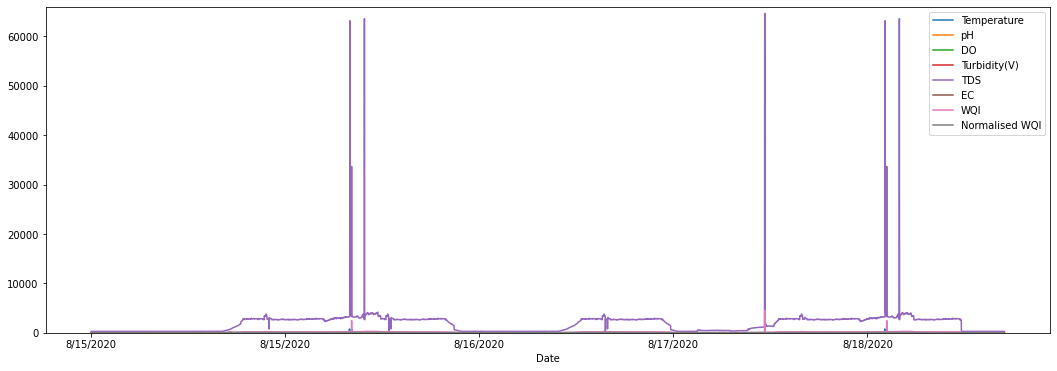

In [ ]:
df.plot('Date', ['Temperature', 'pH','DO','Turbidity(V)','TDS','EC', 'WQI','Normalised WQI'],figsize=(18,6),ylim=(0,66000))

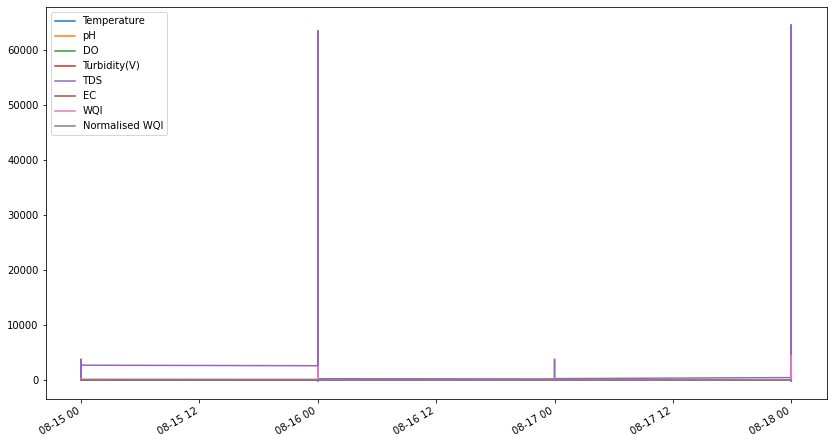

In [ ]:
dataset_train.plot(figsize=(14,8))
pyplot.show()

In [ ]:
df_mean = df.mean()
dataset_train=df.replace(np.nan, df_mean)
dataset_train

,Date,Temperature,pH,DO,Turbidity(V),TDS,EC,WQI,Normalised WQI,WQC,Verdict
0,8/15/2020,33.44,7.55,7.0,4.14,289.00,0.78,26.00,8.81,Very Good,0
1,8/15/2020,33.44,7.94,7.0,4.14,291.00,0.79,26.00,8.81,Very Good,0
2,8/15/2020,33.44,7.88,7.0,4.14,291.00,0.79,26.00,8.81,Very Good,0
3,8/15/2020,33.44,7.82,7.0,4.14,291.00,0.79,26.00,8.81,Very Good,0
4,8/15/2020,33.44,8.01,7.0,4.14,289.00,0.78,26.00,8.81,Very Good,0
...,...,...,...,...,...,...,...,...,...,...,...
4702,8/18/2020,33.57,7.88,7.0,4.14,284.41,0.77,25.78,8.74,Very Good,0
4703,8/18/2020,33.57,7.88,7.0,4.14,284.40,0.77,25.78,8.74,Very Good,0
4704,8/18/2020,33.57,7.88,7.0,4.14,284.40,0.77,25.78,8.74,Very Good,0
4705,8/18/2020,33.57,7.88,7.0,4.14,284.39,0.77,25.78,8.74,Very Good,0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd8c1850d68>,
      dtype=object)

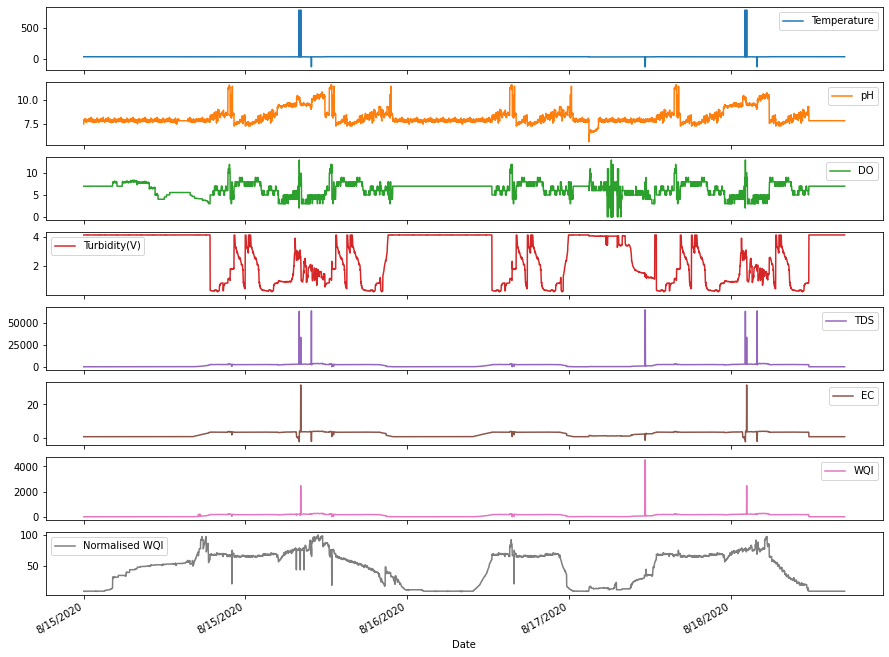

In [ ]:
df.plot(0, [1,2,3,4,5,6,7,8,9], subplots=True, figsize=(15,12))


In [ ]:
print(dataset_train.dtypes)

Date               object
Temperature       float64
pH                float64
DO                float64
Turbidity(V)      float64
TDS               float64
EC                float64
WQI               float64
Normalised WQI    float64
WQC                object
Verdict             int64
dtype: object


#Data processing

Removing all commas and convert data to matrix shape format.



In [ ]:

# Select features (columns) to be involved intro training and predictions
cols = list(dataset_train)[1:9]

# Extract dates (will be used in visualization)
datelist_train = list(dataset_train['Date'])
datelist_train = [dt.datetime.strptime(date, '%m/%d/%Y').date() for date in datelist_train]

print('Training set shape == {}'.format(dataset_train.shape))
print('All timestamps == {}'.format(len(datelist_train)))
print('Featured selected: {}'.format(cols))

Training set shape == (4707, 11)
All timestamps == 4707
Featured selected: ['Temperature', 'pH', 'DO', 'Turbidity(V)', 'TDS', 'EC', 'WQI', 'Normalised WQI']


In [ ]:
dataset_train = pd.DataFrame(dataset_train, columns=cols)
dataset_train.index = datelist_train
dataset_train.index = pd.to_datetime(dataset_train.index)

In [ ]:
dataset_train = dataset_train[cols].astype(str)
for i in cols:
    for j in range(0, len(dataset_train)):
        dataset_train[i][j] = dataset_train[i][j].replace(',', '')
dataset_train = dataset_train.astype(float)

# Using multiple features (predictors)
training_set = dataset_train.to_numpy()

print('Shape of training set == {}.'.format(training_set.shape))
training_set

Shape of training set == (4707, 8).


array([[33.44,  7.55,  7.  , ...,  0.78, 26.  ,  8.81],
       [33.44,  7.94,  7.  , ...,  0.79, 26.  ,  8.81],
       [33.44,  7.88,  7.  , ...,  0.79, 26.  ,  8.81],
       ...,
       [33.57,  7.88,  7.  , ...,  0.77, 25.78,  8.74],
       [33.57,  7.88,  7.  , ...,  0.77, 25.78,  8.74],
       [33.57,  7.88,  7.  , ...,  0.77, 25.78,  8.74]])

In [ ]:
#installing mglearn -- just takes 5s to install -- it's a built in function to understand the difference between the different scalers.
!pip install mglearn

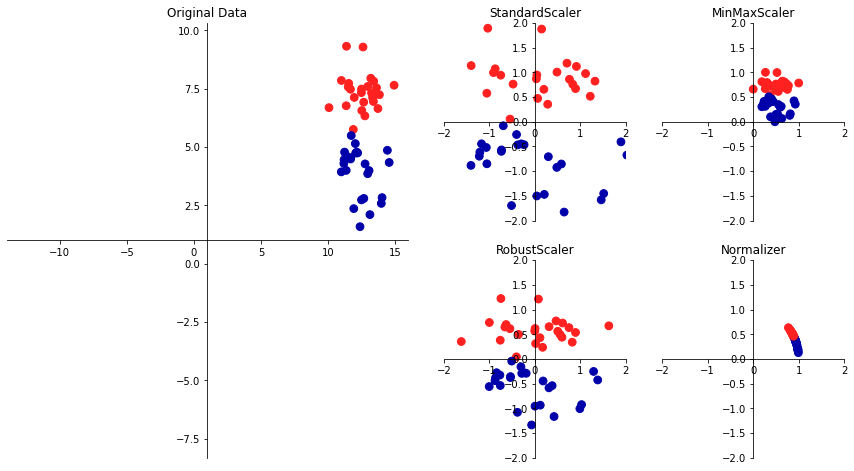

In [ ]:
import mglearn
#this is just a built in thing to understand the difference between the different scalers
mglearn.plots.plot_scaling()

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
training_set_scaled = sc.fit_transform(training_set)

sc_predict = StandardScaler()
sc_predict.fit_transform(training_set[:, 7:8])

array([[-1.40875528],
       [-1.40875528],
       [-1.40875528],
       ...,
       [-1.41140702],
       [-1.41140702],
       [-1.41140702]])

In [ ]:

# Creating a data structure with 90 timestamps and 1 output
X_train = []
y_train = []

n_future = 5  # Number of days we want top predict into the future
n_past = 4    # Number of past days we want to use to predict the future

for i in range(n_past, len(training_set_scaled) - n_future +1):
    X_train.append(training_set_scaled[i - n_past:i, 0:dataset_train.shape[1] - 1])
    y_train.append(training_set_scaled[i + n_future - 1:i + n_future, 7:8])

X_train, y_train = np.array(X_train), np.array(y_train)

print('X_train shape == {}.'.format(X_train.shape))
print('y_train shape == {}.'.format(y_train.shape))

X_train shape == (4699, 4, 7).
y_train shape == (4699, 1, 1).


In [ ]:
X_train=X_train.astype(int)
y_train=y_train.astype(int)

#Create a model Training

Building the LSTM based Neural Network

In [ ]:
# Import Libraries and packages from Keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score
from keras.optimizers import SGD
import tensorflow as tf

In [ ]:
# Initializing the Neural Network based on LSTM
model = Sequential()
 
# Adding 1st LSTM layer
model.add(LSTM(units=64, return_sequences=True, input_shape=(n_past, dataset_train.shape[1]-1)))
model.add(Dropout(0.5)) 
# Adding 2nd LSTM layer
model.add(LSTM(units=25, return_sequences=False))

# Adding Dropout
model.add(Dropout(0.5))
model.add(Dense(units=25,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=10,activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='linear'))
# Compiling the Neural Network
model.compile(optimizer = Adam(learning_rate=0.01), loss='mean_squared_error',metrics=['accuracy'])
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_24 (LSTM)               (None, 4, 64)             18432     
_________________________________________________________________
dropout_48 (Dropout)         (None, 4, 64)             0         
_________________________________________________________________
lstm_25 (LSTM)               (None, 25)                9000      
_________________________________________________________________
dropout_49 (Dropout)         (None, 25)                0         
_________________________________________________________________
dense_36 (Dense)             (None, 25)                650       
_________________________________________________________________
dropout_50 (Dropout)         (None, 25)                0         
_________________________________________________________________
dense_37 (Dense)             (None, 10)              

Start training

In [ ]:
%%time
es = EarlyStopping(monitor='val_loss', min_delta=1e-10, patience=10, verbose=1)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1)
mcp = ModelCheckpoint(filepath='weights.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)

tb = TensorBoard('logs')

history = model.fit(X_train, y_train,
                    shuffle=True,
                    epochs=100,
                    callbacks=[es, rlr, mcp, tb],
                    validation_split=0.2 ,
                    validation_data=(X_train, y_train),
                    verbose=1,
                    batch_size=64)

Epoch 1/100
59/59 [==============================] - 5s 28ms/step - loss: 0.8154 - accuracy: 0.4838 - val_loss: 0.1797 - val_accuracy: 0.6330

Epoch 00001: val_loss improved from inf to 0.17967, saving model to weights.h5
Epoch 2/100
59/59 [==============================] - 1s 9ms/step - loss: 0.2345 - accuracy: 0.6453 - val_loss: 0.1515 - val_accuracy: 0.6511

Epoch 00002: val_loss improved from 0.17967 to 0.15146, saving model to weights.h5
Epoch 3/100
59/59 [==============================] - 1s 9ms/step - loss: 0.2030 - accuracy: 0.6669 - val_loss: 0.1792 - val_accuracy: 0.6106

Epoch 00003: val_loss did not improve from 0.15146
Epoch 4/100
59/59 [==============================] - 1s 10ms/step - loss: 0.2006 - accuracy: 0.6635 - val_loss: 0.1411 - val_accuracy: 0.6457

Epoch 00004: val_loss improved from 0.15146 to 0.14108, saving model to weights.h5
Epoch 5/100
59/59 [==============================] - 1s 9ms/step - loss: 0.1842 - accuracy: 0.6589 - val_loss: 0.1306 - val_accuracy: 

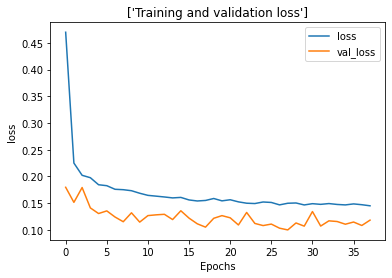

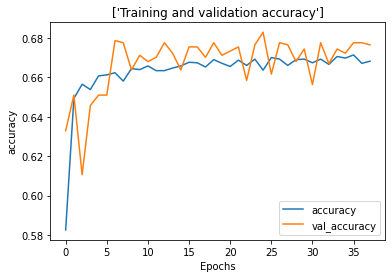

[0.4698284864425659, 0.22501815855503082, 0.20209050178527832, 0.19760285317897797, 0.18442454934120178, 0.18263627588748932, 0.17592962086200714, 0.17517071962356567, 0.1732509732246399, 0.1685197502374649, 0.16455836594104767, 0.16307400166988373, 0.16154178977012634, 0.15980075299739838, 0.16071808338165283, 0.15597128868103027, 0.15404433012008667, 0.15503256022930145, 0.1586754322052002, 0.15427111089229584, 0.15634870529174805, 0.15239818394184113, 0.1498650163412094, 0.14923971891403198, 0.15213996171951294, 0.15128293633460999, 0.14675255119800568, 0.14978879690170288, 0.15029485523700714, 0.14662118256092072, 0.14897729456424713, 0.14773130416870117, 0.14919765293598175, 0.14755021035671234, 0.1466841697692871, 0.14854605495929718, 0.14705616235733032, 0.14502309262752533]
[0.17967289686203003, 0.15145878493785858, 0.1791970282793045, 0.14107544720172882, 0.13055303692817688, 0.13548317551612854, 0.12404860556125641, 0.11519750207662582, 0.13188907504081726, 0.1144947782158851

In [ ]:
def plot_graphs(history, string):
  plt.title(['Training and validation '+string])
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "loss")
plot_graphs(history, "accuracy")
print(history.history['loss'])
print(history.history['val_loss'])

print(history.history['accuracy'])
print(history.history['val_accuracy'])

#Make future predictions

In [ ]:
# Generate list of sequence of days for predictions
datelist_future = pd.date_range(datelist_train[-1], periods=n_future, freq='1d').tolist()

'''
Remeber, we have datelist_train from begining.
'''

# Convert Pandas Timestamp to Datetime object (for transformation) --> FUTURE
datelist_future_ = []
for this_timestamp in datelist_future:
    datelist_future_.append(this_timestamp.date())

In [ ]:
# Perform predictions
predictions_future = model.predict(X_train[-n_future:])

predictions_train = model.predict(X_train[n_past:])

In [ ]:
predictions_future.shape

(5, 1)

In [ ]:
predictions_train.shape

(4695, 1)

In [ ]:
# Inverse the predictions to original measurements

# ---> Special function: convert <datetime.date> to <Timestamp>
def datetime_to_timestamp(x):
    '''
        x : a given datetime value (datetime.date)
    '''
    return datetime.strptime(x.strftime('%m%d%Y'), '%m%d%Y')


y_pred_future = sc_predict.inverse_transform(predictions_future)
y_pred_train = sc_predict.inverse_transform(predictions_train)


 Make predictions for future dates

In [ ]:
PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['Normalised WQI']).set_index(pd.Series(datelist_future))
PREDICTION_TRAIN = pd.DataFrame(y_pred_train, columns=['Normalised WQI']).set_index(pd.Series(datelist_train[2 * n_past + n_future -1:]))

# Convert <datetime.date> to <Timestamp> for PREDCITION_TRAIN
PREDICTION_TRAIN.index = PREDICTION_TRAIN.index.to_series().apply(datetime_to_timestamp)


In [ ]:
PREDICTION_TRAIN=round(PREDICTION_TRAIN)
PREDICTION_TRAIN

,Normalised WQI
2020-08-15,28.0
2020-08-15,28.0
2020-08-15,28.0
2020-08-15,28.0
2020-08-15,28.0
...,...
2020-08-18,28.0
2020-08-18,28.0
2020-08-18,28.0
2020-08-18,28.0


In [ ]:
PREDICTION_TRAIN.shape

(4695, 1)

In [ ]:
PREDICTIONS_FUTURE=round(PREDICTIONS_FUTURE)

In [ ]:
PREDICTIONS_FUTURE

,Normalised WQI
2020-08-18,28.0
2020-08-19,28.0
2020-08-20,28.0
2020-08-21,28.0
2020-08-22,28.0


In [ ]:
PREDICTIONS_FUTURE.shape

(5, 1)

In [ ]:
plt.ion()

Visualize the Predictions

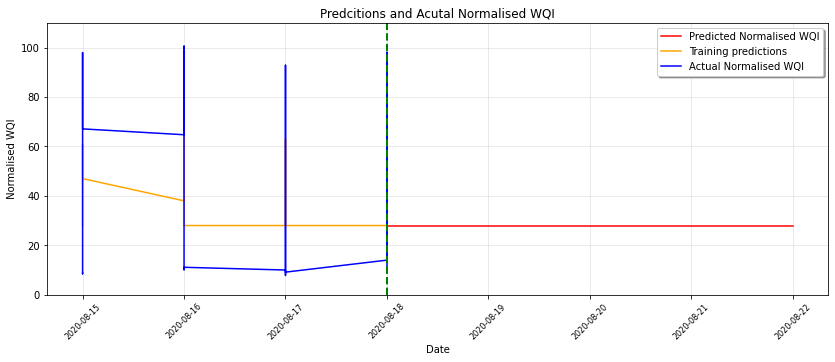

In [ ]:
# Set plot size 
from pylab import rcParams
rcParams['figure.figsize'] = 14, 5

# Plot parameters
START_DATE_FOR_PLOTTING = '8/15/2020'

plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['Normalised WQI'], color='r', label='Predicted Normalised WQI')
plt.plot(PREDICTION_TRAIN.loc[START_DATE_FOR_PLOTTING:].index, PREDICTION_TRAIN.loc[START_DATE_FOR_PLOTTING:]['Normalised WQI'], color='orange', label='Training predictions')
plt.plot(dataset_train.loc[START_DATE_FOR_PLOTTING:].index, dataset_train.loc[START_DATE_FOR_PLOTTING:]['Normalised WQI'], color='b', label='Actual Normalised WQI')

plt.axvline(x = min(PREDICTIONS_FUTURE.index), color='green', linewidth=2, linestyle='--')

plt.grid(which='major', color='#cccccc', alpha=0.5)

plt.legend(shadow=True)
plt.title('Predcitions and Acutal Normalised WQI', family='Arial', fontsize=12)
plt.xlabel('Date', family='Arial', fontsize=10)
plt.ylabel(' Normalised WQI ', family='Arial', fontsize=10)
plt.xticks(rotation=45, fontsize=8)
ax = plt.gca()
ax.set_ylim([0,110])
plt.show()


Evaluating Time Forcasting's prediction

In [ ]:
total_rmse = 0
for i in range(len(PREDICTION_TRAIN)-5):

        rmse = np.sqrt(mean_squared_error(PREDICTION_TRAIN[i:i+5], PREDICTIONS_FUTURE))
        rmse=rmse*6
        print('t+%d RMSE: %f' % ((i+5), rmse))
        total_rmse += rmse

t+5 RMSE: 0.000000
t+6 RMSE: 0.000000
t+7 RMSE: 0.000000
t+8 RMSE: 0.000000
t+9 RMSE: 0.000000
t+10 RMSE: 0.000000
t+11 RMSE: 0.000000
t+12 RMSE: 0.000000
t+13 RMSE: 0.000000
t+14 RMSE: 0.000000
t+15 RMSE: 0.000000
t+16 RMSE: 0.000000
t+17 RMSE: 0.000000
t+18 RMSE: 0.000000
t+19 RMSE: 0.000000
t+20 RMSE: 0.000000
t+21 RMSE: 0.000000
t+22 RMSE: 0.000000
t+23 RMSE: 0.000000
t+24 RMSE: 0.000000
t+25 RMSE: 0.000000
t+26 RMSE: 0.000000
t+27 RMSE: 0.000000
t+28 RMSE: 0.000000
t+29 RMSE: 0.000000
t+30 RMSE: 0.000000
t+31 RMSE: 0.000000
t+32 RMSE: 0.000000
t+33 RMSE: 0.000000
t+34 RMSE: 0.000000
t+35 RMSE: 0.000000
t+36 RMSE: 0.000000
t+37 RMSE: 0.000000
t+38 RMSE: 0.000000
t+39 RMSE: 0.000000
t+40 RMSE: 0.000000
t+41 RMSE: 0.000000
t+42 RMSE: 0.000000
t+43 RMSE: 0.000000
t+44 RMSE: 0.000000
t+45 RMSE: 0.000000
t+46 RMSE: 0.000000
t+47 RMSE: 0.000000
t+48 RMSE: 0.000000
t+49 RMSE: 0.000000
t+50 RMSE: 0.000000
t+51 RMSE: 0.000000
t+52 RMSE: 0.000000
t+53 RMSE: 0.000000
t+54 RMSE: 0.000000
t+55 

In [ ]:
print('total rmse: ', total_rmse)
print('actual acc:',(total_rmse/(len(PREDICTION_TRAIN))) ,'%')

total rmse:  445990.88368713856
actual acc: 94.99273347968872 %


In [ ]:
# Using sklearn
from sklearn.metrics import r2_score
print(r2_score(PREDICTION_TRAIN[i:i+5], PREDICTIONS_FUTURE))

1.0


#Walk Forward Validation

Using keras models with scikit-learn pipelines

In [ ]:
series= PREDICTION_TRAIN
series

,Normalised WQI
2020-08-15,28.0
2020-08-15,28.0
2020-08-15,28.0
2020-08-15,28.0
2020-08-15,28.0
...,...
2020-08-18,28.0
2020-08-18,28.0
2020-08-18,28.0
2020-08-18,28.0


In [ ]:
# split data into train and test
X = series.values   # X is still a column vector with 36 rows
print(X)

[[28.]
 [28.]
 [28.]
 ...
 [28.]
 [28.]
 [28.]]


In [ ]:
series1=PREDICTIONS_FUTURE

In [ ]:
Y= series1.values

In [ ]:
#X = dataset
train, test = X[:-1453], Y[-1453:]
train

array([[28.],
       [28.],
       [28.],
       ...,
       [26.],
       [27.],
       [26.]], dtype=float32)

In [ ]:
test

array([[28.],
       [28.],
       [28.],
       [28.],
       [28.]], dtype=float32)

In [ ]:
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
	# make prediction
	predictions.append(history[-1])
	# observation
	history.append(test[i])

    # report performance
rmse = sqrt(mean_squared_error(test, predictions))
#rmse=rmse/3
print('RMSE: %.3f' % (rmse))

RMSE: 0.894
